In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay,RocCurveDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import GenericUnivariateSelect, chi2
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
# from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

هذا الملف نفس ملف ال (all Experiments)

لكنه منضف و يحتوي على افضل النتائج و النماذج

## Load dataset


In [2]:
dataset =  pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
dataset['bmi'] = dataset['bmi'].fillna(dataset['bmi'].median())

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
def encoding(dataset,column_name):
    label_encoder = LabelEncoder()
    return label_encoder.fit_transform(dataset[column_name])
def toOneHatEncoder(columnName):
    onehatencoder = OneHotEncoder()
    work_type = onehatencoder.fit_transform(datasetWithOnehatEncoding[[columnName]])
    return onehatencoder,work_type.toarray()

def plotData(gridspaceX,gridSpaceY,dataset,featureColumnName,hue,continuousOrCategorical):
    fig = plt.figure(figsize=(35,25))
    gs = fig.add_gridspec(3,4)
    gs.update(wspace=0.3, hspace=0.15)
    ax1 = fig.add_subplot(gs[gridspaceX,gridSpaceY])
    background_color = "#AF7880"

    fig.patch.set_facecolor(background_color) 
    ax1.set_facecolor(background_color) 
    ax1.grid(color='#123456', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    if continuousOrCategorical == 0:
        sns.countplot(ax=ax1, data=dataset, x=featureColumnName,palette = 'Purples', hue= hue,edgecolor='black',**{'hatch':'/','linewidth':2})
    elif continuousOrCategorical ==1:
        sns.kdeplot(ax=ax1, data=dataset, x= featureColumnName,hue=hue, fill=True,palette='Purples', alpha=.5, linewidth=0)
    elif continuousOrCategorical ==2:
        sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [5]:
dataset.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21  28.1     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [6]:
dataset = dataset.drop('id',axis =1)

In [7]:
datasetWithOnehatEncoding = dataset.copy()

In [8]:
ohe , work_type = toOneHatEncoder('work_type')
datasetWithOnehatEncoding[ohe.categories_[0]] = work_type
datasetWithOnehatEncoding.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  Govt_job  \
0          Urban             228.69  36.6  formerly smoked       1       0.0   
1          Rural             202.21  28.1     never smoked       1       0.0   
2          Rural             105.92  32.5     never smoked       1       0.0   
3          Urban             171.23  34.4           smokes       1       0.0   
4          Rural             174.12  24.0     never smoked       1       0.0   

   Never_worked  Private  Self-employed  children  
0           0.0      1.0            0.0       0.0  
1           0.0      0.0            1.0       0.0  
2           0.0      1.0            0.0       0.0  
3           0.0      1.0            0.0       0.0  
4           0.0      0.0            1.0       0.0

In [9]:
ohe , smoking_status = toOneHatEncoder('smoking_status')
datasetWithOnehatEncoding[ohe.categories_[0]] = smoking_status
datasetWithOnehatEncoding.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  Govt_job  \
0          Urban             228.69  36.6  formerly smoked       1       0.0   
1          Rural             202.21  28.1     never smoked       1       0.0   
2          Rural             105.92  32.5     never smoked       1       0.0   
3          Urban             171.23  34.4           smokes       1       0.0   
4          Rural             174.12  24.0     never smoked       1       0.0   

   Never_worked  Private  Self-employed  children  Unknown  formerly smoked  \
0           0.0      1.0            0.0       0.0      0.0              1.0   
1           0.0      0.0            1.0       0.0      0.0              0.0   
2           0.0      1.0            0.0       0.0      0.0              0.0   
3           0.0      1.0            0.0       0.0      0.0              0.0   
4           0.0      0.0            1.0       0.0      0.0              0.0   

   never smoked  smokes  
0           0.0     0.0  
1           1.0     0.0  
2           1.0     0.0  
3           0.0     1.0  
4           1.0     0.0

In [10]:
ohe , gender = toOneHatEncoder('gender')
datasetWithOnehatEncoding[ohe.categories_[0]] = gender
datasetWithOnehatEncoding.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  ...  Private  \
0          Urban             228.69  36.6  formerly smoked  ...      1.0   
1          Rural             202.21  28.1     never smoked  ...      0.0   
2          Rural             105.92  32.5     never smoked  ...      1.0   
3          Urban             171.23  34.4           smokes  ...      1.0   
4          Rural             174.12  24.0     never smoked  ...      0.0   

   Self-employed  children  Unknown  formerly smoked  never smoked  smokes  \
0            0.0       0.0      0.0              1.0           0.0     0.0   
1            1.0       0.0      0.0              0.0           1.0     0.0   
2            0.0       0.0      0.0              0.0           1.0     0.0   
3            0.0       0.0      0.0              0.0           0.0     1.0   
4            1.0       0.0      0.0              0.0           1.0     0.0   

   Female  Male  Other  
0     0.0   1.0    0.0  
1     1.0   0.0    0.0  
2     0.0   1.0    0.0  
3     1.0   0.0    0.0  
4     1.0   0.0    0.0  

[5 rows x 23 columns]

In [11]:
datasetWithOnehatEncoding = datasetWithOnehatEncoding.drop('smoking_status',axis=1)
datasetWithOnehatEncoding = datasetWithOnehatEncoding.drop('gender',axis=1)
datasetWithOnehatEncoding = datasetWithOnehatEncoding.drop('work_type',axis=1)
datasetWithOnehatEncoding = datasetWithOnehatEncoding.drop('Other',axis=1)

In [12]:
datasetWithOnehatEncoding.head()

age  hypertension  heart_disease ever_married Residence_type  \
0  67.0             0              1          Yes          Urban   
1  61.0             0              0          Yes          Rural   
2  80.0             0              1          Yes          Rural   
3  49.0             0              0          Yes          Urban   
4  79.0             1              0          Yes          Rural   

   avg_glucose_level   bmi  stroke  Govt_job  Never_worked  Private  \
0             228.69  36.6       1       0.0           0.0      1.0   
1             202.21  28.1       1       0.0           0.0      0.0   
2             105.92  32.5       1       0.0           0.0      1.0   
3             171.23  34.4       1       0.0           0.0      1.0   
4             174.12  24.0       1       0.0           0.0      0.0   

   Self-employed  children  Unknown  formerly smoked  never smoked  smokes  \
0            0.0       0.0      0.0              1.0           0.0     0.0   
1            1.0       0.0      0.0              0.0           1.0     0.0   
2            0.0       0.0      0.0              0.0           1.0     0.0   
3            0.0       0.0      0.0              0.0           0.0     1.0   
4            1.0       0.0      0.0              0.0           1.0     0.0   

   Female  Male  
0     0.0   1.0  
1     1.0   0.0  
2     0.0   1.0  
3     1.0   0.0  
4     1.0   0.0

In [13]:
datasetWithOnehatEncoding['ever_married'] = encoding(datasetWithOnehatEncoding,'ever_married')
datasetWithOnehatEncoding['Residence_type'] = encoding(datasetWithOnehatEncoding,'Residence_type')

### Normalization

In [14]:
def normalize(value, old_max, old_min, new_max=1, new_min=0):
    old_range = (old_max - old_min)  
    new_range = (new_max - new_min)  
    return (((value - old_min) * new_range) / old_range) + new_min

In [15]:
data = datasetWithOnehatEncoding.copy()
data = data[data['age']>1]
print(data.shape)

maxAge = data['age'].max()
minAge = data['age'].min()
data['age'] = data['age'].apply(lambda x: normalize(x,maxAge, minAge))

maxGlu = data['avg_glucose_level'].max()
minGlu = data['avg_glucose_level'].min()
data['avg_glucose_level'] = data['avg_glucose_level'].apply(lambda x: normalize(x,maxGlu, minGlu))

maxBmi = data['bmi'].max()
minBmi = data['bmi'].min()
data['bmi'] = data['bmi'].apply(lambda x: normalize(x,maxBmi, minBmi))

datasetWithOnehatEncoding = data
datasetWithOnehatEncoding

(5062, 19)


age  hypertension  heart_disease  ever_married  Residence_type  \
0     0.814632             0              1             1               1   
1     0.740484             0              0             1               0   
2     0.975284             0              1             1               0   
3     0.592190             0              0             1               1   
4     0.962926             1              0             1               0   
...        ...           ...            ...           ...             ...   
5105  0.975284             1              0             1               1   
5106  0.987642             0              0             1               1   
5107  0.419179             0              0             1               0   
5108  0.616906             0              0             1               0   
5109  0.530400             0              0             1               1   

      avg_glucose_level       bmi  stroke  Govt_job  Never_worked  Private  \
0              0.801265  0.301260       1       0.0           0.0      1.0   
1              0.679023  0.203895       1       0.0           0.0      0.0   
2              0.234512  0.254296       1       0.0           0.0      1.0   
3              0.536008  0.276060       1       0.0           0.0      1.0   
4              0.549349  0.156930       1       0.0           0.0      0.0   
...                 ...       ...     ...       ...           ...      ...   
5105           0.132167  0.203895       0       0.0           0.0      1.0   
5106           0.323516  0.340206       0       0.0           0.0      0.0   
5107           0.128658  0.232532       0       0.0           0.0      0.0   
5108           0.513203  0.175258       0       0.0           0.0      1.0   
5109           0.139230  0.182131       0       1.0           0.0      0.0   

      Self-employed  children  Unknown  formerly smoked  never smoked  smokes  \
0               0.0       0.0      0.0              1.0           0.0     0.0   
1               1.0       0.0      0.0              0.0           1.0     0.0   
2               0.0       0.0      0.0              0.0           1.0     0.0   
3               0.0       0.0      0.0              0.0           0.0     1.0   
4               1.0       0.0      0.0              0.0           1.0     0.0   
...             ...       ...      ...              ...           ...     ...   
5105            0.0       0.0      0.0              0.0           1.0     0.0   
5106            1.0       0.0      0.0              0.0           1.0     0.0   
5107            1.0       0.0      0.0              0.0           1.0     0.0   
5108            0.0       0.0      0.0              1.0           0.0     0.0   
5109            0.0       0.0      1.0              0.0           0.0     0.0   

      Female  Male  
0        0.0   1.0  
1        1.0   0.0  
2        0.0   1.0  
3        1.0   0.0  
4        1.0   0.0  
...      ...   ...  
5105     1.0   0.0  
5106     1.0   0.0  
5107     1.0   0.0  
5108     0.0   1.0  
5109     1.0   0.0  

[5062 rows x 19 columns]

## Data copy method

In [16]:
rowsWithOnes = datasetWithOnehatEncoding.loc[datasetWithOnehatEncoding['stroke'] == 1]

In [17]:
dfcopy = datasetWithOnehatEncoding.copy()

In [18]:
for i in range(0,18):
  dfcopy = dfcopy.append(rowsWithOnes, ignore_index = True)

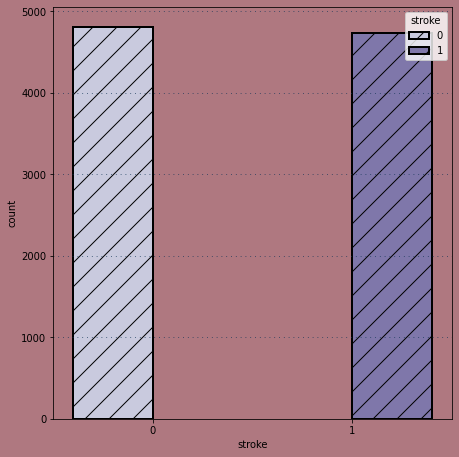

In [19]:
plotData(0,1,dfcopy,'stroke','stroke',0)

In [20]:
# input_oneHatEn = datasetWithOnehatEncoding.drop('stroke',axis =1)
# output_oneHatEn  = datasetWithOnehatEncoding['stroke']
# input_oneHatEn  = np.asarray(input_oneHatEn)
# output_oneHatEn = np.asarray(output_oneHatEn)

input_oneHatEn = dfcopy.drop('stroke',axis =1)
output_oneHatEn  = dfcopy['stroke']
input_oneHatEn  = np.asarray(input_oneHatEn)
output_oneHatEn = np.asarray(output_oneHatEn)

### Data split

In [21]:
x_train_copy,x_test_copy,y_train_copy,y_test_copy = train_test_split(input_oneHatEn,output_oneHatEn,random_state=0)

In [22]:
print(f'x_train', x_train_copy.shape)
print(f'y_train',y_train_copy.shape)
print(f'x_test',x_test_copy.shape)
print(f'y_test',y_test_copy.shape)

x_train (7158, 18)
y_train (7158,)
x_test (2386, 18)
y_test (2386,)


In [23]:
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

In [24]:
def scale(scale_type,x_train,x_test):
  scaler = scale_type
  scaler.fit(x_train)
  x_train_scaled = scaler.transform(x_train)
  x_test_scaled = scaler.transform(x_test)
  print("X_train.shape: {}".format(x_train_scaled.shape))
  print("X_train_scaled.shape: {}".format(x_train_scaled.shape))
  return x_train_scaled ,x_test_scaled

def selectionFeature(select_type,x_train,y_train,x_test):
  select = select_type
  select.fit(x_train, y_train)
  x_train_selected = select.transform(x_train)
  x_test_selected = select.transform(x_test)
  print("X_train.shape: {}".format(x_train.shape))
  print("X_train_selected.shape: {}".format(x_train_selected.shape))
  return x_train_selected,x_test_selected

from sklearn.feature_selection import RFE
def rfe(x_train,y_train,x_test,numberOfFeatures):
  select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),n_features_to_select=numberOfFeatures)
  select.fit(x_train, y_train)
  x_train_selected = select.transform(x_train)
  x_test_selected = select.transform(x_test)
  print("X_train.shape: {}".format(x_train.shape))
  print("X_train_selected.shape: {}".format(x_train_selected.shape))
  return x_train_selected,x_test_selected

def pca(n_components,x_train,x_test):
  p_c_a = PCA(n_components)
  p_c_a.fit(x_train)
  x_train_pca = p_c_a.transform(x_train)
  x_test_pca = p_c_a.transform(x_test)
  print("X_train.shape: {}".format(x_train.shape))
  print("X_train_pca.shape: {}".format(x_train_pca.shape))
  return x_train_pca,x_test_pca

### Model accuracy (without curves)

In [25]:
def modelsW(modelName , defintionTheModelAndHisParameter,x_train,y_train,x_test,y_test):
    classifier = defintionTheModelAndHisParameter.fit(x_train,y_train)
    y_predicted = classifier.predict(x_test)
    confusionMatrixForTheClassifier = confusion_matrix(y_test,y_predicted )
    precision = precision_score(y_test,y_predicted)
    recall = recall_score(y_test,y_predicted)
    scoreOnTest = classifier.score(x_test,y_test)
    scoreOnTrain =classifier.score(x_train,y_train)
    classificationReportForTheClassifier =classification_report(y_test, y_predicted)
    auc1 = roc_auc_score(y_test, y_predicted)
    f1 = f1_score(y_test, y_predicted)
    print(modelName)
    print("score on train data with", modelName," :", scoreOnTrain)
    print("---------------------------------------------------------------------------------------")
    print("score on test data with ", modelName," :",scoreOnTest)
    print("---------------------------------------------------------------------------------------")
    print("preceision: ", precision)
    print("---------------------------------------------------------------------------------------")
    print("recall: ",recall)
    print("---------------------------------------------------------------------------------------")
    print("Most frequent class (",modelName,")\n")
    print_cm(confusionMatrixForTheClassifier, ['Not one', 'One'])
    print("---------------------------------------------------------------------------------------")
    print("classification report:\n",confusionMatrixForTheClassifier)
    print("---------------------------------------------------------------------------------------")
    print('Test set AUC: ', auc1)
    print("---------------------------------------------------------------------------------------")
    print('F1: ',f1)

### Model accuracy (with curves)

In [26]:
results = pd.DataFrame(columns = ['Model','Train_Score',"Test_Score","Precision","Recall","Auc","F1"])

In [27]:
def modelsall(modelName , defintionTheModelAndHisParameter,x_train,y_train,x_test,y_test,model,parameter,pRange,results = results):
    classifier = defintionTheModelAndHisParameter.fit(x_train,y_train)
    y_predicted = classifier.predict(x_test)
    confusionMatrixForTheClassifier = confusion_matrix(y_test,y_predicted )
    precision = precision_score(y_test,y_predicted)
    recall = recall_score(y_test,y_predicted)
    scoreOnTest = classifier.score(x_test,y_test)
    scoreOnTrain =classifier.score(x_train,y_train)
    classificationReportForTheClassifier =classification_report(y_test, y_predicted)
    auc1 = roc_auc_score(y_test, y_predicted)
    f1 = f1_score(y_test, y_predicted)
    print(modelName)
    print("score on train data with", modelName," :", scoreOnTrain)
    print("---------------------------------------------------------------------------------------")
    print("score on test data with ", modelName," :",scoreOnTest)
    print("---------------------------------------------------------------------------------------")
    print("preceision: ", precision)
    print("---------------------------------------------------------------------------------------")
    print("recall: ",recall)
    print("---------------------------------------------------------------------------------------")
    print("Most frequent class (",modelName,")\n")
    print_cm(confusionMatrixForTheClassifier, ['Not one', 'One'])
    print("---------------------------------------------------------------------------------------")
    print("classification report:\n",confusionMatrixForTheClassifier)
    print("---------------------------------------------------------------------------------------")
    print('Test set AUC: ', auc1)
    print("---------------------------------------------------------------------------------------")
    print('F1: ',f1)
    ####Learning curve
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    N, train_lc, val_lc = learning_curve(defintionTheModelAndHisParameter,
                                         x_train, y_train, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[0].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[0].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[0].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[0].set_ylim((0, 1))
    ax[0].set_xlim((N[0], N[-1]))
    ax[0].set_xlabel('training size')
    ax[0].set_ylabel('score')
    ax[0].set_title('Leaning curve')
    ax[0].legend(loc='best')
    ######    Validation curve
    name = parameter
    print(name)
    train_score, val_score = validation_curve(model, x_train, y_train,
                                          param_name= name ,
                                          param_range = pRange,
                                          cv=7)
    ax[1].plot(pRange, np.median(train_score, 1), color='blue', label='training score')
    ax[1].plot(pRange, np.median(val_score, 1), color='red', label='validation score')
    ax[1].legend(loc='best')
    ax[1].set_ylim(0, 1)
    ax[1].set_xlabel('pRange')
    ax[1].set_ylabel('score')
  ### auc 
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_predicted)
    roc_auc_lr = auc(fpr_lr, tpr_lr)

    plt.figure()
    plt.xlim([0.0, 1.00])
    plt.ylim([0.0, 1.05])
    plt.plot(fpr_lr, tpr_lr, lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.show()



    i = results.shape[0]
    results.loc[i,'Model'] = modelName
    results.loc[i,'Train_Score'] = scoreOnTrain
    results.loc[i,"Test_Score"] = scoreOnTest
    results.loc[i,"Precision"] = precision
    results.loc[i,'Recall'] = recall
    results.loc[i,'Auc'] = auc1
    results.loc[i,'F1'] = f1
    

In [28]:
def models(modelName , defintionTheModelAndHisParameter,x_train,y_train,x_test,y_test,results = results):
    classifier = defintionTheModelAndHisParameter.fit(x_train,y_train)
    y_predicted = classifier.predict(x_test)
    confusionMatrixForTheClassifier = confusion_matrix(y_test,y_predicted )
    precision = precision_score(y_test,y_predicted)
    recall = recall_score(y_test,y_predicted)
    scoreOnTest = classifier.score(x_test,y_test)
    scoreOnTrain =classifier.score(x_train,y_train)
    classificationReportForTheClassifier =classification_report(y_test, y_predicted)
    auc1 = roc_auc_score(y_test, y_predicted)
    f1 = f1_score(y_test, y_predicted)
    print(modelName)
    print("score on train data with", modelName," :", scoreOnTrain)
    print("---------------------------------------------------------------------------------------")
    print("score on test data with ", modelName," :",scoreOnTest)
    print("---------------------------------------------------------------------------------------")
    print("preceision: ", precision)
    print("---------------------------------------------------------------------------------------")
    print("recall: ",recall)
    print("---------------------------------------------------------------------------------------")
    print("Most frequent class (",modelName,")\n")
    print_cm(confusionMatrixForTheClassifier, ['Not one', 'One'])
    print("---------------------------------------------------------------------------------------")
    print("classification report:\n",confusionMatrixForTheClassifier)
    print("---------------------------------------------------------------------------------------")
    print('Test set AUC: ', auc1)
    print("---------------------------------------------------------------------------------------")
    print('F1: ',f1)
    ####Learning curve
    # fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    # N, train_lc, val_lc = learning_curve(defintionTheModelAndHisParameter,
    #                                      x_train, y_train, cv=7,
    #                                      train_sizes=np.linspace(0.3, 1, 25))

    # ax[0].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    # ax[0].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    # ax[0].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
    #              color='gray', linestyle='dashed')

    # ax[0].set_ylim((0, 1))
    # ax[0].set_xlim((N[0], N[-1]))
    # ax[0].set_xlabel('training size')
    # ax[0].set_ylabel('score')
    # ax[0].set_title('Leaning curve')
    # ax[0].legend(loc='best')
    ######    Validation curve
#     name = parameter
#     print(name)
#     train_score, val_score = validation_curve(model, x_train, y_train,
#                                           param_name= name ,
#                                           param_range = pRange,
#                                           cv=7)
#     ax[1].plot(pRange, np.median(train_score, 1), color='blue', label='training score')
#     ax[1].plot(pRange, np.median(val_score, 1), color='red', label='validation score')
#     ax[1].legend(loc='best')
#     ax[1].set_ylim(0, 1)
#     ax[1].set_xlabel('pRange')
#     ax[1].set_ylabel('score')
  ### auc 
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_predicted)
    roc_auc_lr = auc(fpr_lr, tpr_lr)

    plt.figure()
    plt.xlim([0.0, 1.00])
    plt.ylim([0.0, 1.05])
    plt.plot(fpr_lr, tpr_lr, lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.show()



    i = results.shape[0]
    results.loc[i,'Model'] = modelName
    results.loc[i,'Train_Score'] = scoreOnTrain
    results.loc[i,"Test_Score"] = scoreOnTest
    results.loc[i,"Precision"] = precision
    results.loc[i,'Recall'] = recall
    results.loc[i,'Auc'] = auc1
    results.loc[i,'F1'] = f1
    

### Feature selection

In [29]:
for i in range(6,19):
    print('\n','########',i,'#######','\n')
    x_train_selected_KBest,x_test_selected_KBest = selectionFeature(SelectKBest(chi2,k=i),x_train_copy,y_train_copy,x_test_copy)
    modelsW('RandomForestClassifier',RandomForestClassifier(random_state=0), x_train_selected_KBest,y_train_copy,x_test_selected_KBest,y_test_copy)


 ######## 6 ####### 

X_train.shape: (7158, 18)
X_train_selected.shape: (7158, 6)
RandomForestClassifier
score on train data with RandomForestClassifier  : 0.8492595697122101
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier  : 0.8378038558256496
---------------------------------------------------------------------------------------
preceision:  0.797523670793882
---------------------------------------------------------------------------------------
recall:  0.909468438538206
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier )

            Not one     One 
    Not one   904.0   278.0 
        One   109.0  1095.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 904  278]
 [ 109 1095]]
----------------------------------------------------------------------

Best selection is 18

## PCA

In [30]:
for n in range(6,19):
    print('\n','########',i,'#######','\n')
    x_train_pca,x_test_pca = pca(n,x_train_copy,x_test_copy)
    modelsW('RandomForestClassifier',RandomForestClassifier(random_state=0), x_train_pca,y_train_copy,x_test_pca,y_test_copy)


 ######## 18 ####### 

X_train.shape: (7158, 18)
X_train_pca.shape: (7158, 6)
RandomForestClassifier
score on train data with RandomForestClassifier  : 1.0
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier  : 0.9727577535624476
---------------------------------------------------------------------------------------
preceision:  0.9487785657998424
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier )

            Not one     One 
    Not one  1117.0    65.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1117   65]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC: 

In [31]:
x_train_pca,x_test_pca = pca(10,x_train_copy,x_test_copy)
x_train_scaled_standard,x_test_scaled_standard = scale(StandardScaler(),x_train_copy,x_test_copy)
x_train_scaled_MinMax,x_test_scaled_MinMax = scale(MinMaxScaler(),x_train_copy,x_test_copy)
x_train_scaled_Robust,x_test_scaled_Robust = scale(RobustScaler(),x_train_copy,x_test_copy)
x_train_selected_RFE ,x_test_selected_RFE = rfe(x_train_copy,y_train_copy,x_test_copy,10)

X_train.shape: (7158, 18)
X_train_pca.shape: (7158, 10)
X_train.shape: (7158, 18)
X_train_scaled.shape: (7158, 18)
X_train.shape: (7158, 18)
X_train_scaled.shape: (7158, 18)
X_train.shape: (7158, 18)
X_train_scaled.shape: (7158, 18)
X_train.shape: (7158, 18)
X_train_selected.shape: (7158, 10)


### Without scaler and pca and feature selection and tuning


support vector machine-Copy
score on train data with support vector machine-Copy  : 0.8118189438390612
---------------------------------------------------------------------------------------
score on test data with  support vector machine-Copy  : 0.8055322715842415
---------------------------------------------------------------------------------------
preceision:  0.7761194029850746
---------------------------------------------------------------------------------------
recall:  0.8637873754152824
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine-Copy )

            Not one     One 
    Not one   882.0   300.0 
        One   164.0  1040.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 882  300]
 [ 164 1040]]
---------------------------------------------------------------------------------------
Test set AUC:  0.8049901344081488
---------

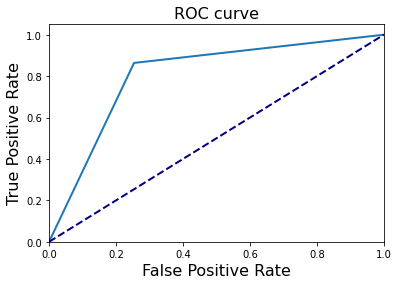

DecisionTree Classifier-Copy
score on train data with DecisionTree Classifier-Copy  : 1.0
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier-Copy  : 0.9740150880134115
---------------------------------------------------------------------------------------
preceision:  0.9510268562401264
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier-Copy )

            Not one     One 
    Not one  1120.0    62.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1120   62]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9737732656514382
-----------------------------------

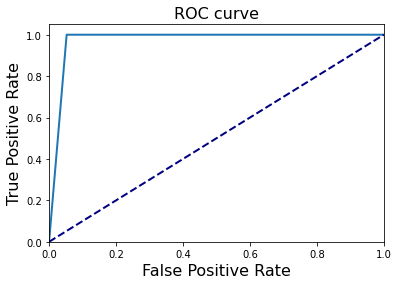

RandomForestClassifier-Copy
score on train data with RandomForestClassifier-Copy  : 1.0
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-Copy  : 0.987845766974015
---------------------------------------------------------------------------------------
preceision:  0.9764801297648013
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-Copy )

            Not one     One 
    Not one  1153.0    29.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1153   29]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9877326565143825
----------------------------------------

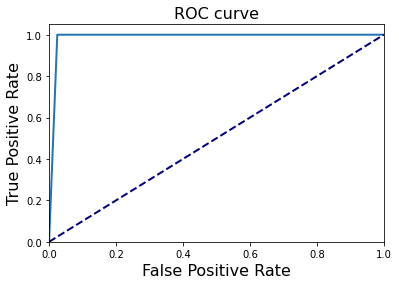

AdaBoostClassifier-Copy
score on train data with AdaBoostClassifier-Copy  : 0.7964515227717239
---------------------------------------------------------------------------------------
score on test data with  AdaBoostClassifier-Copy  : 0.8021793797150042
---------------------------------------------------------------------------------------
preceision:  0.775187969924812
---------------------------------------------------------------------------------------
recall:  0.856312292358804
---------------------------------------------------------------------------------------
Most frequent class ( AdaBoostClassifier-Copy )

            Not one     One 
    Not one   883.0   299.0 
        One   173.0  1031.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 883  299]
 [ 173 1031]]
---------------------------------------------------------------------------------------
Test set AUC:  0.8016756047242413
---------------------------

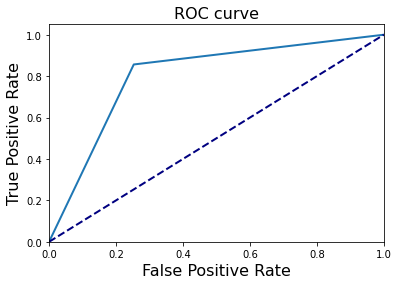

In [32]:
models('support vector machine-Copy',SVC(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy)
models('DecisionTree Classifier-Copy',DecisionTreeClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy)
models('RandomForestClassifier-Copy',RandomForestClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy)
models('AdaBoostClassifier-Copy',AdaBoostClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy)

### Try with Pca

support vector machine-pcaCopy
score on train data with support vector machine-pcaCopy  : 0.7872310701313217
---------------------------------------------------------------------------------------
score on test data with  support vector machine-pcaCopy  : 0.7661357921207042
---------------------------------------------------------------------------------------
preceision:  0.7399702823179792
---------------------------------------------------------------------------------------
recall:  0.8272425249169435
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine-pcaCopy )

            Not one     One 
    Not one   832.0   350.0 
        One   208.0   996.0 
---------------------------------------------------------------------------------------
classification report:
 [[832 350]
 [208 996]]
---------------------------------------------------------------------------------------
Test set AUC:  0.7655671169423973
-

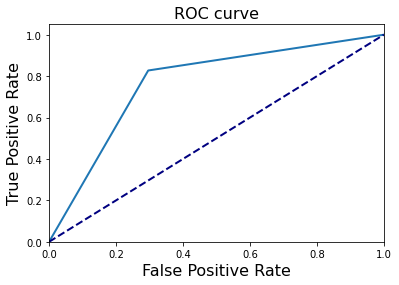

DecisionTree Classifier-pcaCopy
score on train data with DecisionTree Classifier-pcaCopy  : 1.0
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier-pcaCopy  : 0.9735959765297569
---------------------------------------------------------------------------------------
preceision:  0.9502762430939227
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier-pcaCopy )

            Not one     One 
    Not one  1119.0    63.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1119   63]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9733502538071066
-----------------------

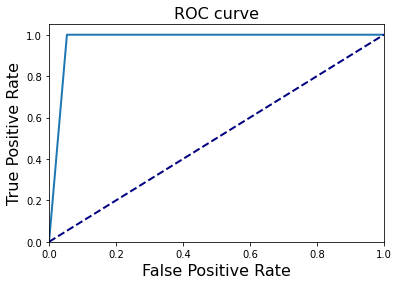

RandomForestClassifier-pcaCopy
score on train data with RandomForestClassifier-pcaCopy  : 1.0
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-pcaCopy  : 0.9744341994970662
---------------------------------------------------------------------------------------
preceision:  0.9517786561264822
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-pcaCopy )

            Not one     One 
    Not one  1121.0    61.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1121   61]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9741962774957699
---------------------------

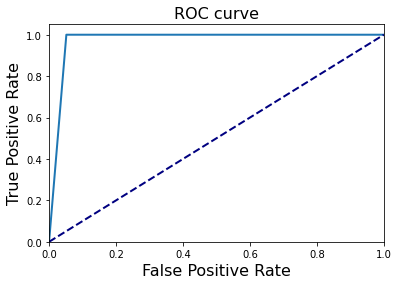

AdaBoostClassifier-pcaCopy
score on train data with AdaBoostClassifier-pcaCopy  : 0.7834590667784297
---------------------------------------------------------------------------------------
score on test data with  AdaBoostClassifier-pcaCopy  : 0.7657166806370495
---------------------------------------------------------------------------------------
preceision:  0.7671913835956918
---------------------------------------------------------------------------------------
recall:  0.7691029900332226
---------------------------------------------------------------------------------------
Most frequent class ( AdaBoostClassifier-pcaCopy )

            Not one     One 
    Not one   901.0   281.0 
        One   278.0   926.0 
---------------------------------------------------------------------------------------
classification report:
 [[901 281]
 [278 926]]
---------------------------------------------------------------------------------------
Test set AUC:  0.76568516675942
-------------------

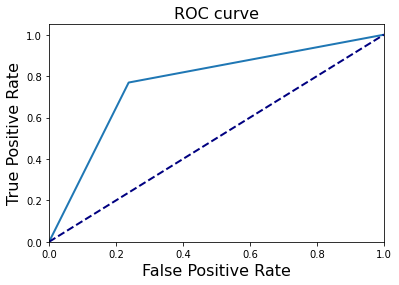

In [33]:
models('support vector machine-pcaCopy',SVC(random_state=0),x_train_pca,y_train_copy,x_test_pca,y_test_copy)
models('DecisionTree Classifier-pcaCopy',DecisionTreeClassifier(random_state=0),x_train_pca,y_train_copy,x_test_pca,y_test_copy)
models('RandomForestClassifier-pcaCopy',RandomForestClassifier(random_state=0),x_train_pca,y_train_copy,x_test_pca,y_test_copy)
models('AdaBoostClassifier-pcaCopy',AdaBoostClassifier(random_state=0),x_train_pca,y_train_copy,x_test_pca,y_test_copy)

try pca with scaler

try with scaler only

In [34]:
x_train_copy = x_train_scaled_standard
x_test_copy = x_test_scaled_standard

support vector machine-stdScaledCopy
score on train data with support vector machine-stdScaledCopy  : 0.8446493433920089
---------------------------------------------------------------------------------------
score on test data with  support vector machine-stdScaledCopy  : 0.8310980720871752
---------------------------------------------------------------------------------------
preceision:  0.7995512341062079
---------------------------------------------------------------------------------------
recall:  0.8878737541528239
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine-stdScaledCopy )

            Not one     One 
    Not one   914.0   268.0 
        One   135.0  1069.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 914  268]
 [ 135 1069]]
---------------------------------------------------------------------------------------
Test se

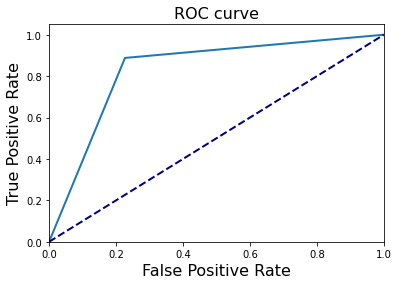

DecisionTree Classifier-stdScaledCopy
score on train data with DecisionTree Classifier-stdScaledCopy  : 1.0
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier-stdScaledCopy  : 0.9731768650461022
---------------------------------------------------------------------------------------
preceision:  0.9495268138801262
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier-stdScaledCopy )

            Not one     One 
    Not one  1118.0    64.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1118   64]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.972927241962775


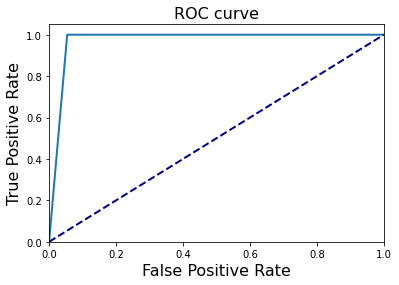

RandomForestClassifier-stdScaledCopy
score on train data with RandomForestClassifier-stdScaledCopy  : 1.0
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-stdScaledCopy  : 0.987845766974015
---------------------------------------------------------------------------------------
preceision:  0.9764801297648013
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-stdScaledCopy )

            Not one     One 
    Not one  1153.0    29.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1153   29]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9877326565143825
----

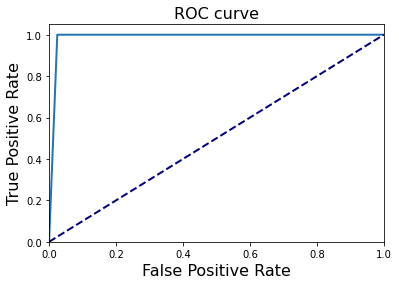

AdaBoostClassifier-stdScaledCopy
score on train data with AdaBoostClassifier-stdScaledCopy  : 0.7964515227717239
---------------------------------------------------------------------------------------
score on test data with  AdaBoostClassifier-stdScaledCopy  : 0.8021793797150042
---------------------------------------------------------------------------------------
preceision:  0.775187969924812
---------------------------------------------------------------------------------------
recall:  0.856312292358804
---------------------------------------------------------------------------------------
Most frequent class ( AdaBoostClassifier-stdScaledCopy )

            Not one     One 
    Not one   883.0   299.0 
        One   173.0  1031.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 883  299]
 [ 173 1031]]
---------------------------------------------------------------------------------------
Test set AUC:  0.80167560

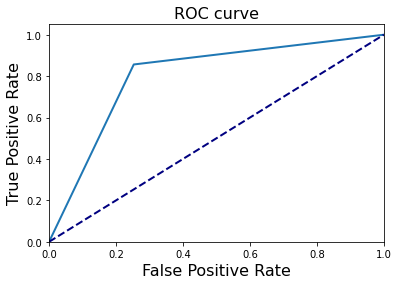

In [35]:
models('support vector machine-stdScaledCopy',SVC(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy)
models('DecisionTree Classifier-stdScaledCopy',DecisionTreeClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy)
models('RandomForestClassifier-stdScaledCopy',RandomForestClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy)
models('AdaBoostClassifier-stdScaledCopy',AdaBoostClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy)

let's try another scaler type

In [36]:
x_train_copy = x_train_scaled_MinMax
x_test_copy = x_test_scaled_MinMax

support vector machine-minmaxCopy
score on train data with support vector machine-minmaxCopy  : 0.8116792400111763
---------------------------------------------------------------------------------------
score on test data with  support vector machine-minmaxCopy  : 0.8055322715842415
---------------------------------------------------------------------------------------
preceision:  0.7761194029850746
---------------------------------------------------------------------------------------
recall:  0.8637873754152824
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine-minmaxCopy )

            Not one     One 
    Not one   882.0   300.0 
        One   164.0  1040.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 882  300]
 [ 164 1040]]
---------------------------------------------------------------------------------------
Test set AUC:  0.80

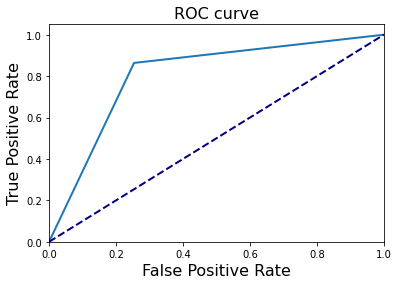

DecisionTree Classifier-minmaxCopy
score on train data with DecisionTree Classifier-minmaxCopy  : 1.0
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier-minmaxCopy  : 0.9740150880134115
---------------------------------------------------------------------------------------
preceision:  0.9510268562401264
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier-minmaxCopy )

            Not one     One 
    Not one  1120.0    62.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1120   62]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9737732656514382
-----------

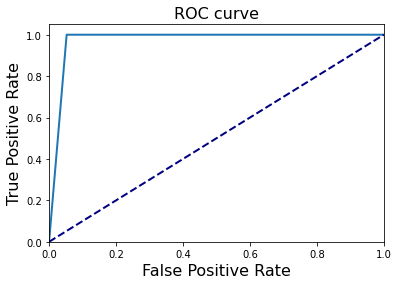

RandomForestClassifier-minmaxCopy
score on train data with RandomForestClassifier-minmaxCopy  : 1.0
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-minmaxCopy  : 0.987845766974015
---------------------------------------------------------------------------------------
preceision:  0.9764801297648013
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-minmaxCopy )

            Not one     One 
    Not one  1153.0    29.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1153   29]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9877326565143825
----------------

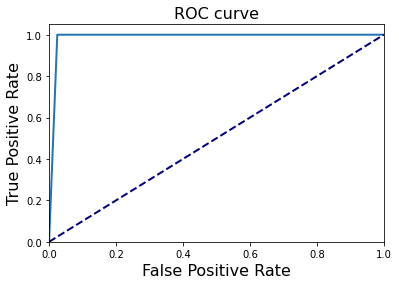

AdaBoostClassifier-minmaxCopy
score on train data with AdaBoostClassifier-minmaxCopy  : 0.7964515227717239
---------------------------------------------------------------------------------------
score on test data with  AdaBoostClassifier-minmaxCopy  : 0.8021793797150042
---------------------------------------------------------------------------------------
preceision:  0.775187969924812
---------------------------------------------------------------------------------------
recall:  0.856312292358804
---------------------------------------------------------------------------------------
Most frequent class ( AdaBoostClassifier-minmaxCopy )

            Not one     One 
    Not one   883.0   299.0 
        One   173.0  1031.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 883  299]
 [ 173 1031]]
---------------------------------------------------------------------------------------
Test set AUC:  0.8016756047242413
---

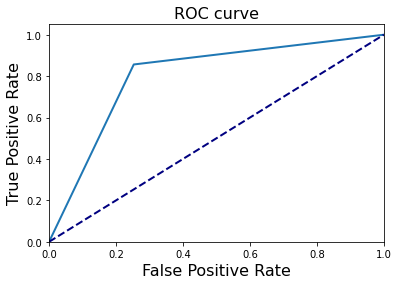

In [37]:
models('support vector machine-minmaxCopy',SVC(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy)
models('DecisionTree Classifier-minmaxCopy',DecisionTreeClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy)
models('RandomForestClassifier-minmaxCopy',RandomForestClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy)
models('AdaBoostClassifier-minmaxCopy',AdaBoostClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy)

let's try feature selection with scaler(standard)

In [38]:
results.to_csv('results.csv') 

In [39]:
x_train_copy =x_train_selected_RFE
x_test_copy = x_test_selected_RFE

support vector machine-refCopy
score on train data with support vector machine-refCopy  : 0.805951383067896
---------------------------------------------------------------------------------------
score on test data with  support vector machine-refCopy  : 0.8005029337803856
---------------------------------------------------------------------------------------
preceision:  0.7724550898203593
---------------------------------------------------------------------------------------
recall:  0.8571428571428571
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine-refCopy )

            Not one     One 
    Not one   878.0   304.0 
        One   172.0  1032.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 878  304]
 [ 172 1032]]
---------------------------------------------------------------------------------------
Test set AUC:  0.799975827894609

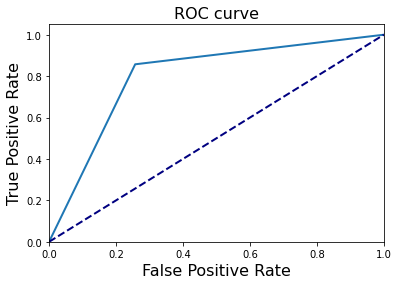

DecisionTree Classifier-refCopy
score on train data with DecisionTree Classifier-refCopy  : 1.0
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier-refCopy  : 0.9706621961441744
---------------------------------------------------------------------------------------
preceision:  0.945054945054945
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier-refCopy )

            Not one     One 
    Not one  1112.0    70.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1112   70]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9703891708967851
------------------------

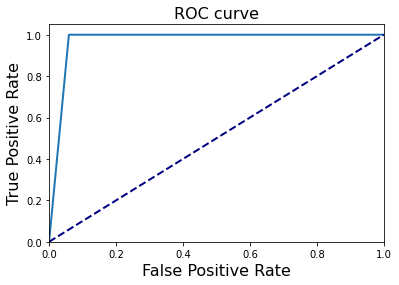

RandomForestClassifier-refCopy
score on train data with RandomForestClassifier-refCopy  : 1.0
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-refCopy  : 0.9853310980720872
---------------------------------------------------------------------------------------
preceision:  0.9717514124293786
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-refCopy )

            Not one     One 
    Not one  1147.0    35.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1147   35]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9851945854483926
---------------------------

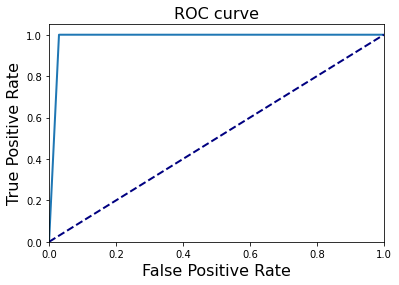

AdaBoostClassifier-refCopy
score on train data with AdaBoostClassifier-refCopy  : 0.7970103380832635
---------------------------------------------------------------------------------------
score on test data with  AdaBoostClassifier-refCopy  : 0.8063704945515507
---------------------------------------------------------------------------------------
preceision:  0.773598820058997
---------------------------------------------------------------------------------------
recall:  0.8712624584717608
---------------------------------------------------------------------------------------
Most frequent class ( AdaBoostClassifier-refCopy )

            Not one     One 
    Not one   875.0   307.0 
        One   155.0  1049.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 875  307]
 [ 155 1049]]
---------------------------------------------------------------------------------------
Test set AUC:  0.8057665930260665
--------------

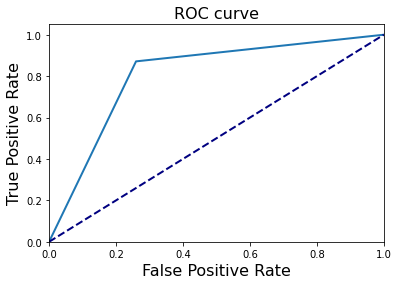

In [40]:
models('support vector machine-refCopy',SVC(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy)
models('DecisionTree Classifier-refCopy',DecisionTreeClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy)
models('RandomForestClassifier-refCopy',RandomForestClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy)
models('AdaBoostClassifier-refCopy',AdaBoostClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy)

## SMOTE Method

In [41]:
input_oneHatEn = datasetWithOnehatEncoding.drop('stroke',axis =1)
output_oneHatEn  = datasetWithOnehatEncoding['stroke']
input_oneHatEn  = np.asarray(input_oneHatEn)
output_oneHatEn = np.asarray(output_oneHatEn)

In [56]:
sm = SMOTE(random_state=2)
x_res, y_res = sm.fit_resample(input_oneHatEn,output_oneHatEn.ravel())

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,random_state=0,shuffle =True)

In [45]:
print('After OverSampling, the shape of train_x: {}'.format(x_train.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train.shape))

print('After OverSampling, counts of label 1: {}'.format(sum(y_train == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train == 0)))

After OverSampling, the shape of train_x: (7219, 18)
After OverSampling, the shape of train_y: (7219,)
After OverSampling, counts of label 1: 3591
After OverSampling, counts of label 0: 3628


without scales and featurefof
fors77

In [46]:
x_train_copy = x_train
y_train_copy = y_train
x_test_copy = x_test
y_test_copy = y_test

support vector machine-Smote
score on train data with support vector machine-Smote  : 0.8560742485108741
---------------------------------------------------------------------------------------
score on test data with  support vector machine-Smote  : 0.8462816784378895
---------------------------------------------------------------------------------------
preceision:  0.8073593073593074
---------------------------------------------------------------------------------------
recall:  0.9157119476268413
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine-Smote )

            Not one     One 
    Not one   918.0   267.0 
        One   103.0  1119.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 918  267]
 [ 103 1119]]
---------------------------------------------------------------------------------------
Test set AUC:  0.8451977459653195
-----

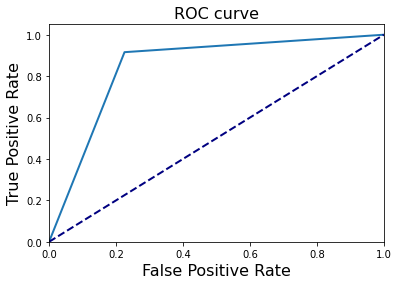

DecisionTree Classifier-Smote
score on train data with DecisionTree Classifier-Smote  : 1.0
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier-Smote  : 0.8691316992106356
---------------------------------------------------------------------------------------
preceision:  0.8678021086780211
---------------------------------------------------------------------------------------
recall:  0.8756137479541735
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier-Smote )

            Not one     One 
    Not one  1022.0   163.0 
        One   152.0  1070.0 
---------------------------------------------------------------------------------------
classification report:
 [[1022  163]
 [ 152 1070]]
---------------------------------------------------------------------------------------
Test set AUC:  0.8690305026690699
----------------

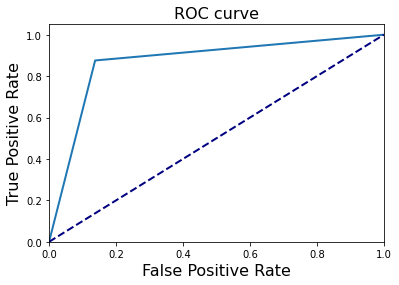

RandomForestClassifier-Smote
score on train data with RandomForestClassifier-Smote  : 1.0
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-Smote  : 0.9331117573743248
---------------------------------------------------------------------------------------
preceision:  0.9141295862607338
---------------------------------------------------------------------------------------
recall:  0.9582651391162029
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-Smote )

            Not one     One 
    Not one  1075.0   110.0 
        One    51.0  1171.0 
---------------------------------------------------------------------------------------
classification report:
 [[1075  110]
 [  51 1171]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9327190674483968
--------------------

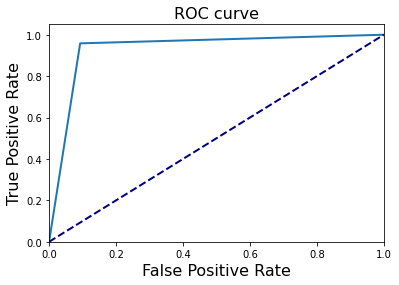

AdaBoostClassifier-Smote
score on train data with AdaBoostClassifier-Smote  : 0.8347416539686937
---------------------------------------------------------------------------------------
score on test data with  AdaBoostClassifier-Smote  : 0.8238471125882841
---------------------------------------------------------------------------------------
preceision:  0.794682422451994
---------------------------------------------------------------------------------------
recall:  0.8805237315875614
---------------------------------------------------------------------------------------
Most frequent class ( AdaBoostClassifier-Smote )

            Not one     One 
    Not one   907.0   278.0 
        One   146.0  1076.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 907  278]
 [ 146 1076]]
---------------------------------------------------------------------------------------
Test set AUC:  0.8229622877347088
----------------------

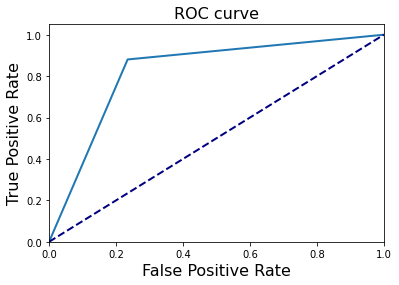

In [47]:
models('support vector machine-Smote',SVC(random_state=0),x_train,y_train,x_test,y_test)
models('DecisionTree Classifier-Smote',DecisionTreeClassifier(random_state=0),x_train,y_train,x_test,y_test)
models('RandomForestClassifier-Smote',RandomForestClassifier(random_state=0),x_train,y_train,x_test,y_test)
models('AdaBoostClassifier-Smote',AdaBoostClassifier(random_state=0),x_train,y_train,x_test,y_test)

In [48]:
x_train_scaled_standard_smote,x_test_scaled_standard_smote = scale(StandardScaler(),x_train,x_test)
x_train_scaled_MinMax_smote,x_test_scaled_MinMax_smote = scale(MinMaxScaler(),x_train,x_test)
x_train_scaled_Robust_smote,x_test_scaled_Robust_smote = scale(RobustScaler(),x_train,x_test)
x_train_selected_RFE_smote ,x_test_selected_RFE_smote = rfe(x_train,y_train,x_test,10)

X_train.shape: (7219, 18)
X_train_scaled.shape: (7219, 18)
X_train.shape: (7219, 18)
X_train_scaled.shape: (7219, 18)
X_train.shape: (7219, 18)
X_train_scaled.shape: (7219, 18)
X_train.shape: (7219, 18)
X_train_selected.shape: (7219, 10)


let's try out data after smote with scaler and feature selection

In [49]:
x_train_copy = x_train_scaled_standard_smote
y_train_copy = y_train
x_test_copy = x_test_scaled_standard_smote
y_test_copy = y_test

support vector machine-stdScaledSmote
score on train data with support vector machine-stdScaledSmote  : 0.8786535531237013
---------------------------------------------------------------------------------------
score on test data with  support vector machine-stdScaledSmote  : 0.8624844204403822
---------------------------------------------------------------------------------------
preceision:  0.8221258134490239
---------------------------------------------------------------------------------------
recall:  0.9304418985270049
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine-stdScaledSmote )

            Not one     One 
    Not one   939.0   246.0 
        One    85.0  1137.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 939  246]
 [  85 1137]]
---------------------------------------------------------------------------------------
Tes

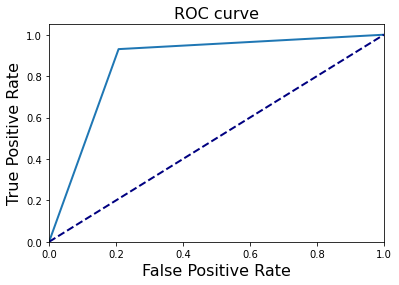

DecisionTree Classifier-stdScaledSmote
score on train data with DecisionTree Classifier-stdScaledSmote  : 1.0
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier-stdScaledSmote  : 0.8691316992106356
---------------------------------------------------------------------------------------
preceision:  0.8678021086780211
---------------------------------------------------------------------------------------
recall:  0.8756137479541735
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier-stdScaledSmote )

            Not one     One 
    Not one  1022.0   163.0 
        One   152.0  1070.0 
---------------------------------------------------------------------------------------
classification report:
 [[1022  163]
 [ 152 1070]]
---------------------------------------------------------------------------------------
Test set AUC: 

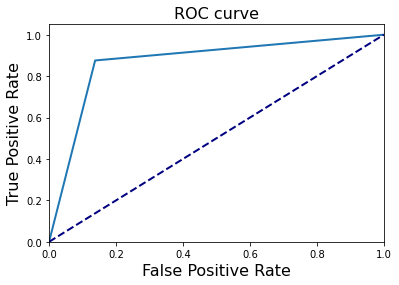

RandomForestClassifier-stdScaledSmote
score on train data with RandomForestClassifier-stdScaledSmote  : 1.0
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-stdScaledSmote  : 0.9322808475280432
---------------------------------------------------------------------------------------
preceision:  0.9133489461358314
---------------------------------------------------------------------------------------
recall:  0.9574468085106383
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-stdScaledSmote )

            Not one     One 
    Not one  1074.0   111.0 
        One    52.0  1170.0 
---------------------------------------------------------------------------------------
classification report:
 [[1074  111]
 [  52 1170]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9

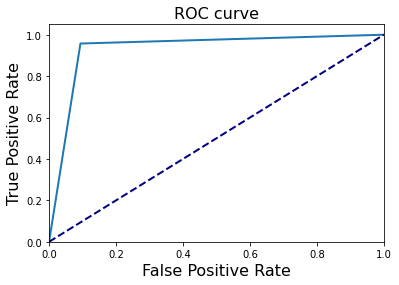

AdaBoostClassifier-stdScaledSmote
score on train data with AdaBoostClassifier-stdScaledSmote  : 0.8347416539686937
---------------------------------------------------------------------------------------
score on test data with  AdaBoostClassifier-stdScaledSmote  : 0.8238471125882841
---------------------------------------------------------------------------------------
preceision:  0.794682422451994
---------------------------------------------------------------------------------------
recall:  0.8805237315875614
---------------------------------------------------------------------------------------
Most frequent class ( AdaBoostClassifier-stdScaledSmote )

            Not one     One 
    Not one   907.0   278.0 
        One   146.0  1076.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 907  278]
 [ 146 1076]]
---------------------------------------------------------------------------------------
Test set AUC:  0.822

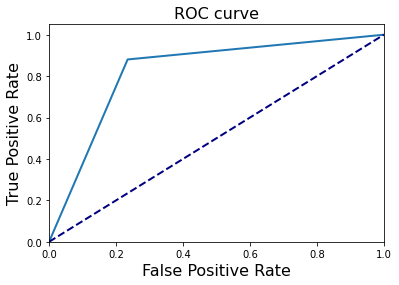

In [50]:
models('support vector machine-stdScaledSmote',SVC(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy)
models('DecisionTree Classifier-stdScaledSmote',DecisionTreeClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy)
models('RandomForestClassifier-stdScaledSmote',RandomForestClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy)
models('AdaBoostClassifier-stdScaledSmote',AdaBoostClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy)

## Grid Search

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA 

In [52]:
def findBestParameter(nameOftheClassifier,classifier,param_grid,cv,x_train,y_train,x_test,y_test):
  grid = GridSearchCV(classifier, param_grid, cv=3, scoring = 'accuracy')
  grid.fit(x_train, y_train)
  
  print('Grid best parameter (max. accuracy): ', grid.best_params_)
  print('Grid best score (accuracy): ', grid.best_score_)

  # alternative metric to optimize over grid parameters: AUC
  grid_clf_auc = GridSearchCV(classifier, param_grid = param_grid, scoring = 'roc_auc')
  grid_clf_auc.fit(x_train, y_train)
  if nameOftheClassifier != 'knn' and nameOftheClassifier != 'guassianNB' and nameOftheClassifier!= 'DecisionTree' and nameOftheClassifier != 'XGB' and nameOftheClassifier!='RandomForest':
    y_decision_fn_scores_acc = grid.decision_function(x_test)
    y_decision_fn_scores_auc = grid_clf_auc.decision_function(x_test) 
    print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
  
  print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
  print('Grid best score (AUC): ', grid_clf_auc.best_score_)

Do not run this cells 

**LR best parameters**

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),LogisticRegression(max_iter =1000, solver ='liblinear',**kwargs))

param_grid = {'logisticregression__penalty': ['l1','l2'],
              'logisticregression__C': [0.01,0.1,1]}


findBestParameter('lr',PolynomialRegression(), param_grid ,cv,x_train,y_train,x_test,y_test)
#### best parameters 2,l1,0.01
#### best parameters 2,l1,0.1 AUC

Grid best parameter (max. accuracy):  {'logisticregression__C': 1, 'logisticregression__penalty': 'l1'}

Grid best score (accuracy):  0.9402412280701755

Test set AUC:  0.7595916037795676

Grid best parameter (max. AUC):  {'logisticregression__C': 1, 'logisticregression__penalty': 'l1'}

Grid best score (AUC):  0.9864321566828604

In [ ]:
findBestParameter('lr',PolynomialRegression(), param_grid ,cv,x_train_scaled_standard_smote,y_train_res,x_test_scaled_standard_smote,y_test)

Grid best parameter (max. accuracy):  {'logisticregression__C': 1, 'logisticregression__penalty': 'l1'}
Grid best score (accuracy):  0.9498355263157895
Test set AUC:  0.7542139641067918
Grid best parameter (max. AUC):  {'logisticregression__C': 1, 'logisticregression__penalty': 'l1'}
Grid best score (AUC):  0.988641352889346


**KNN best parameters**

In [ ]:
findBestParameter('knn',KNeighborsClassifier(), dict(n_neighbors=np.arange(1, 31, 1),metric=['euclidean', 'manhattan', 'chebyshev', 'minkowski']),cv,x_train_res,y_train_res,x_test,y_test)

Grid best parameter (max. accuracy):  {'metric': 'manhattan', 'n_neighbors': 2}
Grid best score (accuracy):  0.9372258771929824
Grid best parameter (max. AUC):  {'metric': 'manhattan', 'n_neighbors': 8}
Grid best score (AUC):  0.9685281536618874


In [ ]:
findBestParameter('knn',KNeighborsClassifier(), dict(n_neighbors=np.arange(1, 31, 1),metric=['euclidean', 'manhattan', 'chebyshev']),cv,x_train_scaled_standard_smote,y_train_res,x_test_scaled_standard_smote,y_test)

Grid best parameter (max. accuracy):  {'metric': 'manhattan', 'n_neighbors': 1}
Grid best score (accuracy):  0.9683388157894738
Grid best parameter (max. AUC):  {'metric': 'manhattan', 'n_neighbors': 6}
Grid best score (AUC):  0.990742248910573


In [ ]:
findBestParameter('knn',KNeighborsClassifier(), dict(n_neighbors=np.arange(1, 31, 1),metric=['euclidean', 'manhattan', 'chebyshev']),cv,x_train_selected_percentile_smote,y_train_res,x_test_selected_percentile_smote,y_test)

Grid best parameter (max. accuracy):  {'metric': 'manhattan', 'n_neighbors': 1}
Grid best score (accuracy):  0.9036458333333334
Grid best parameter (max. AUC):  {'metric': 'manhattan', 'n_neighbors': 8}
Grid best score (AUC):  0.9480129704150053


**guassianNB best paramete**

In [ ]:
findBestParameter('guassianNB',GaussianNB(), {'var_smoothing': np.logspace(0,-9, num=100)},cv,x_train_scaled_standard_smote,y_train_res,x_test_scaled_standard_smote,y_test)

Grid best parameter (max. accuracy):  {'var_smoothing': 0.0657933224657568}
Grid best score (accuracy):  0.7076480263157895
Grid best parameter (max. AUC):  {'var_smoothing': 1e-09}
Grid best score (AUC):  0.8531242529617042


**SVM best paramete**

In [ ]:
findBestParameter('svm',SVC(), {'kernel':('linear', 'rbf'), 'C': [0.001, 0.01, 0.1, 1],'gamma':[0.001, 0.01, 0.05, 0.1, 1]}
                  ,cv,x_train_scaled_standard_smote,y_train_res,x_test_scaled_standard_smote,y_test)

Grid best parameter (max. accuracy):  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Grid best score (accuracy):  0.9554550438596491
Test set AUC:  0.7122709112816286
Grid best parameter (max. AUC):  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Grid best score (AUC):  0.9883055239583809


**DecisionTree best paramete**

In [ ]:
findBestParameter('DecisionTree',DecisionTreeClassifier(random_state=42), { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15),'max_leaf_nodes': list(range(2, 100))}
                  ,cv,x_train_scaled_standard_smote,y_train_res,x_test_scaled_standard_smote,y_test)

Grid best parameter (max. accuracy):  {'criterion': 'entropy', 'max_depth': 14, 'max_leaf_nodes': 94}
Grid best score (accuracy):  0.9527138157894738
Grid best parameter (max. AUC):  {'criterion': 'entropy', 'max_depth': 11, 'max_leaf_nodes': 37}
Grid best score (AUC):  0.9750771588850096


**RandomForest best paramete**

In [ ]:
findBestParameter('RandomForest',RandomForestClassifier(random_state = 42), [{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}],cv,x_train_res,y_train_res,x_test,y_test)

Grid best parameter (max. accuracy):  {'criterion': 'gini', 'n_estimators': 200, 'random_state': 0}
Grid best score (accuracy):  0.9710800438596491
Grid best parameter (max. AUC):  {'criterion': 'entropy', 'n_estimators': 200, 'random_state': 0}
Grid best score (AUC):  0.9966132261268866


Run from here 

support vector machine-Grid
score on train data with support vector machine-Grid  : 0.8339105139215958
---------------------------------------------------------------------------------------
score on test data with  support vector machine-Grid  : 0.8142916493560449
---------------------------------------------------------------------------------------
preceision:  0.7700348432055749
---------------------------------------------------------------------------------------
recall:  0.9042553191489362
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine-Grid )

            Not one     One 
    Not one   855.0   330.0 
        One   117.0  1105.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 855  330]
 [ 117 1105]]
---------------------------------------------------------------------------------------
Test set AUC:  0.8128871532453542
---------

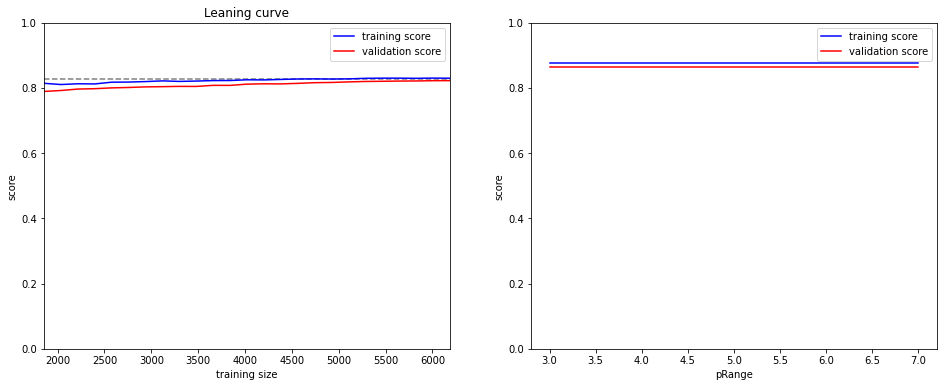

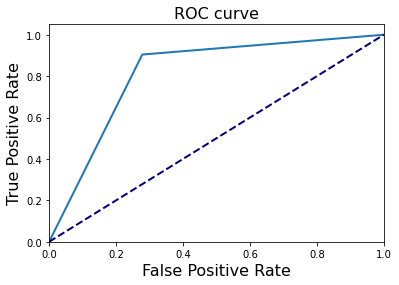

DecisionTree Classifier-Grid
score on train data with DecisionTree Classifier-Grid  : 0.883363346723923
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier-Grid  : 0.8595762359783964
---------------------------------------------------------------------------------------
preceision:  0.8343419062027232
---------------------------------------------------------------------------------------
recall:  0.9026186579378068
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier-Grid )

            Not one     One 
    Not one   966.0   219.0 
        One   119.0  1103.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 966  219]
 [ 119 1103]]
---------------------------------------------------------------------------------------
Test set AUC:  0.8589042656777641
------

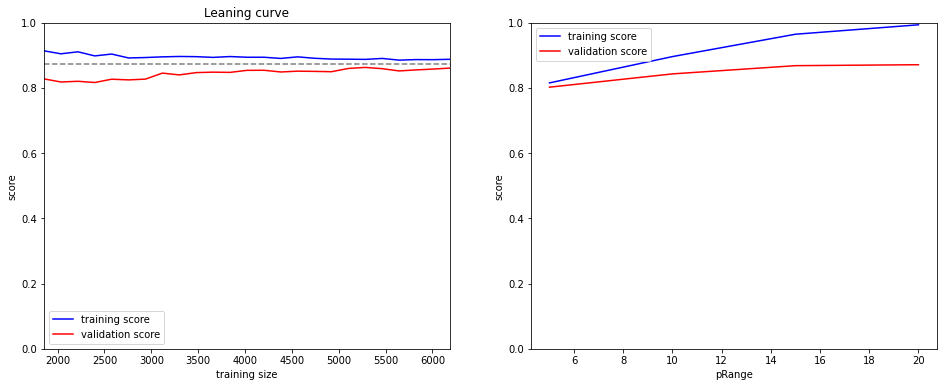

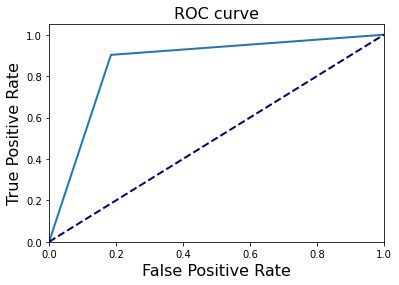

RandomForestClassifier-Grid
score on train data with RandomForestClassifier-Grid  : 0.99861476658817
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-Grid  : 0.9243872039883673
---------------------------------------------------------------------------------------
preceision:  0.9140127388535032
---------------------------------------------------------------------------------------
recall:  0.939443535188216
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-Grid )

            Not one     One 
    Not one  1077.0   108.0 
        One    74.0  1148.0 
---------------------------------------------------------------------------------------
classification report:
 [[1077  108]
 [  74 1148]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9241521473409434
------------

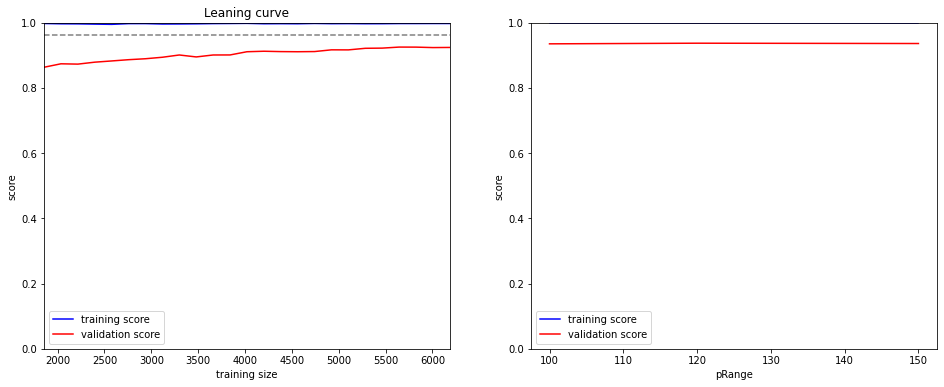

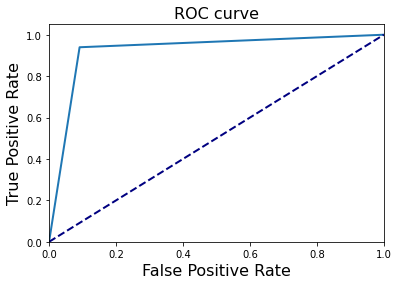

In [53]:
modelsall('support vector machine-Grid',SVC(random_state=42,C=0.1,gamma=0.1,kernel='rbf'),x_train_copy,y_train_copy,x_test_copy,y_test_copy,SVC(),'degree',[3,5,7])
modelsall('DecisionTree Classifier-Grid',DecisionTreeClassifier(random_state=42,criterion = 'entropy', max_depth = 14, max_leaf_nodes = 94),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DecisionTreeClassifier(),'max_depth',[5,10,15,20])
modelsall('RandomForestClassifier-Grid',RandomForestClassifier(random_state=4,criterion = 'gini', n_estimators= 10),x_train_copy,y_train_copy,x_test_copy,y_test_copy,RandomForestClassifier(random_state=0),'n_estimators',[100,120,150])

Voting
score on train data with Voting  : 0.9565036708685414
---------------------------------------------------------------------------------------
score on test data with  Voting  : 0.8761944329040299
---------------------------------------------------------------------------------------
preceision:  0.8793103448275862
---------------------------------------------------------------------------------------
recall:  0.8764320785597381
---------------------------------------------------------------------------------------
Most frequent class ( Voting )

            Not one     One 
    Not one  1038.0   147.0 
        One   151.0  1071.0 
---------------------------------------------------------------------------------------
classification report:
 [[1038  147]
 [ 151 1071]]
---------------------------------------------------------------------------------------
Test set AUC:  0.8761907228241729
---------------------------------------------------------------------------------------
F1:  

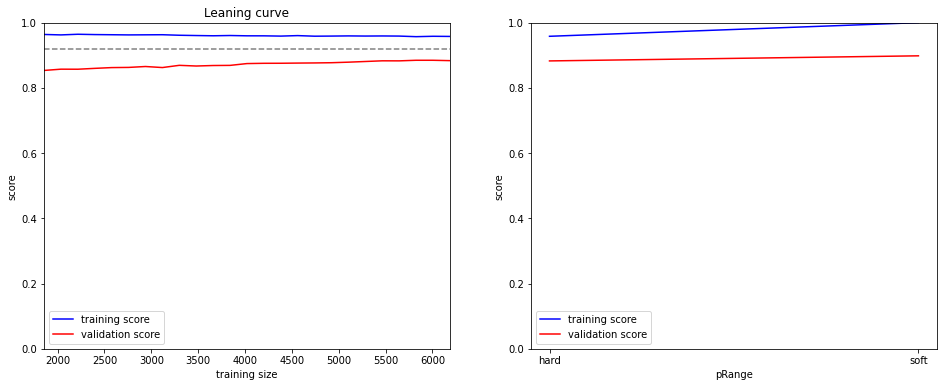

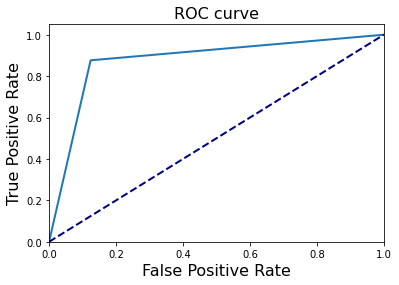

In [54]:
from sklearn.ensemble import VotingClassifier
log_clf = LogisticRegression(max_iter= 10000, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', dt_clf), ('rf', rf),('ada',ada)],
    voting='hard')

modelsall('Voting',voting_clf,x_train_copy,y_train_copy,x_test_copy,y_test_copy,VotingClassifier(estimators=[('lr', log_clf), ('dt', dt_clf), ('rf', rf),('ada',ada)]),'voting',['hard','soft'])


#Results

In [55]:
results1= results
pd.set_option('display.max_rows', 100)
results1

Model Train_Score Test_Score Precision  \
0              support vector machine-Copy    0.811819   0.805532  0.776119   
1             DecisionTree Classifier-Copy         1.0   0.974015  0.951027   
2              RandomForestClassifier-Copy         1.0   0.987846   0.97648   
3                  AdaBoostClassifier-Copy    0.796452   0.802179  0.775188   
4           support vector machine-pcaCopy    0.787231   0.766136   0.73997   
5          DecisionTree Classifier-pcaCopy         1.0   0.973596  0.950276   
6           RandomForestClassifier-pcaCopy         1.0   0.974434  0.951779   
7               AdaBoostClassifier-pcaCopy    0.783459   0.765717  0.767191   
8     support vector machine-stdScaledCopy    0.844649   0.831098  0.799551   
9    DecisionTree Classifier-stdScaledCopy         1.0   0.973177  0.949527   
10    RandomForestClassifier-stdScaledCopy         1.0   0.987846   0.97648   
11        AdaBoostClassifier-stdScaledCopy    0.796452   0.802179  0.775188   
12       support vector machine-minmaxCopy    0.811679   0.805532  0.776119   
13      DecisionTree Classifier-minmaxCopy         1.0   0.974015  0.951027   
14       RandomForestClassifier-minmaxCopy         1.0   0.987846   0.97648   
15           AdaBoostClassifier-minmaxCopy    0.796452   0.802179  0.775188   
16          support vector machine-refCopy    0.805951   0.800503  0.772455   
17         DecisionTree Classifier-refCopy         1.0   0.970662  0.945055   
18          RandomForestClassifier-refCopy         1.0   0.985331  0.971751   
19              AdaBoostClassifier-refCopy     0.79701    0.80637  0.773599   
20            support vector machine-Smote    0.856074   0.846282  0.807359   
21           DecisionTree Classifier-Smote         1.0   0.869132  0.867802   
22            RandomForestClassifier-Smote         1.0   0.933112   0.91413   
23                AdaBoostClassifier-Smote    0.834742   0.823847  0.794682   
24   support vector machine-stdScaledSmote    0.878654   0.862484  0.822126   
25  DecisionTree Classifier-stdScaledSmote         1.0   0.869132  0.867802   
26   RandomForestClassifier-stdScaledSmote         1.0   0.932281  0.913349   
27       AdaBoostClassifier-stdScaledSmote    0.834742   0.823847  0.794682   
28             support vector machine-Grid    0.833911   0.814292  0.770035   
29            DecisionTree Classifier-Grid    0.883363   0.859576  0.834342   
30             RandomForestClassifier-Grid    0.998615   0.924387  0.914013   
31                                  Voting    0.956504   0.876194   0.87931   

      Recall       Auc        F1  
0   0.863787   0.80499   0.81761  
1        1.0  0.973773  0.974899  
2        1.0  0.987733    0.9881  
3   0.856312  0.801676  0.813733  
4   0.827243  0.765567  0.781176  
5        1.0   0.97335  0.974504  
6        1.0  0.974196  0.975294  
7   0.769103  0.765685  0.768146  
8   0.887874   0.83057  0.841401  
9        1.0  0.972927   0.97411  
10       1.0  0.987733    0.9881  
11  0.856312  0.801676  0.813733  
12  0.863787   0.80499   0.81761  
13       1.0  0.973773  0.974899  
14       1.0  0.987733    0.9881  
15  0.856312  0.801676  0.813733  
16  0.857143  0.799976  0.812598  
17       1.0  0.970389  0.971751  
18       1.0  0.985195  0.985673  
19  0.871262  0.805767  0.819531  
20  0.915712  0.845198  0.858129  
21  0.875614  0.869031   0.87169  
22  0.958265  0.932719  0.935677  
23  0.880524  0.822962  0.835404  
24  0.930442  0.861423  0.872937  
25  0.875614  0.869031   0.87169  
26  0.957447  0.931888  0.934878  
27  0.880524  0.822962  0.835404  
28  0.904255  0.812887  0.831765  
29  0.902619  0.858904  0.867138  
30  0.939444  0.924152  0.926554  
31  0.876432  0.876191  0.877869

In [65]:
results1[results1['Precision']==results1['Precision'].max()]

Model Train_Score Test_Score Precision  \
2            RandomForestClassifier-Copy         1.0   0.987846   0.97648   
10  RandomForestClassifier-stdScaledCopy         1.0   0.987846   0.97648   
14     RandomForestClassifier-minmaxCopy         1.0   0.987846   0.97648   

   Recall       Auc      F1  
2     1.0  0.987733  0.9881  
10    1.0  0.987733  0.9881  
14    1.0  0.987733  0.9881

In [66]:
results1[results1['Recall']==results1['Recall'].max()]

Model Train_Score Test_Score Precision  \
1            DecisionTree Classifier-Copy         1.0   0.974015  0.951027   
2             RandomForestClassifier-Copy         1.0   0.987846   0.97648   
5         DecisionTree Classifier-pcaCopy         1.0   0.973596  0.950276   
6          RandomForestClassifier-pcaCopy         1.0   0.974434  0.951779   
9   DecisionTree Classifier-stdScaledCopy         1.0   0.973177  0.949527   
10   RandomForestClassifier-stdScaledCopy         1.0   0.987846   0.97648   
13     DecisionTree Classifier-minmaxCopy         1.0   0.974015  0.951027   
14      RandomForestClassifier-minmaxCopy         1.0   0.987846   0.97648   
17        DecisionTree Classifier-refCopy         1.0   0.970662  0.945055   
18         RandomForestClassifier-refCopy         1.0   0.985331  0.971751   

   Recall       Auc        F1  
1     1.0  0.973773  0.974899  
2     1.0  0.987733    0.9881  
5     1.0   0.97335  0.974504  
6     1.0  0.974196  0.975294  
9     1.0  0.972927   0.97411  
10    1.0  0.987733    0.9881  
13    1.0  0.973773  0.974899  
14    1.0  0.987733    0.9881  
17    1.0  0.970389  0.971751  
18    1.0  0.985195  0.985673